# Final Project
#### Georgia & Sanjive

**Goal:** For our final project in Data 620, the topic to be addressed was sentiment levels in an area where a tourist had passed away due to tragic circumstances. In our case, we took the incident where the 22-year old american tourist Bakari Henderson died after a violent encounter in the greek village of Laganas on July 7th of 2017. Twitter was used to collect tweets regarding the incident, analyze the sentiments attached to the hashtags (pertaining to both the victim and the location) and a t-test was performed with the aim to determine whether the overall opinion on the location as one to travel to had changed.

In [1]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
from nltk.corpus import stopwords
import time
import collections
import re

In [3]:
# Reading in tweets and labeling them positive/negative/neutral
class TwitterClient(object):
    def __init__(self):
        # keys and tokens from the Twitter Dev Console
        # codes were removed for privacy
        consumer_key = ckey
        consumer_secret = csecret
        access_token = atoken
        access_token_secret = asecret
 
        # authentication
        try:
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            self.auth.set_access_token(access_token, access_token_secret)
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")

    # cleaning tweet from special characters so that everything is unicode
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    # Get sentiment (pos or neg) using TextBlob
    def get_tweet_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    # Fetch tweets and read them in
    def get_tweets(self, query, count = 100):
        tweets = []
        try:
            fetched_tweets = self.api.search(q = query, count = count)

            for tweet in fetched_tweets:
                parsed_tweet = {}
 
                parsed_tweet['text'] = tweet.text
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                if tweet.retweet_count > 0:
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            return tweets
 
        except tweepy.TweepError as e:
            print("Error : " + str(e))

### Taking a look at the tweets

#### Regarding the victim

In [4]:
# Creating object for victim
def main():
    api = TwitterClient()
    tweets = api.get_tweets(query = '#BakariHenderson', count = 200)
    
    # Positive/Negative/Neutral tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    
    print"Percent Tweets:"
    print"---------------"
    print("Positive: {} %".format(100*len(ptweets)/len(tweets)))
    print("Negative: {} %".format(100*len(ntweets)/len(tweets)))
    print("Neutral:  {} %".format(100*len(neutweets)/len(tweets)))
 
    # printing first 10 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:9]:
        print(tweet['text'])
 
    # printing first 10 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:9]:
        print(tweet['text'])
        
    # printing first 10 negative tweets
    print("\n\nNeutral tweets:")
    for tweet in neutweets[:9]:
        print(tweet['text'])
 
if __name__ == "__main__":
    # calling main function
    main()

Percent Tweets:
---------------
Positive: 17 %
Negative: 42 %
Neutral:  40 %


Positive tweets:
RT @flor0975: #BakariHenderson  Such hatred towards an absolutely amazing young man. #brokenheart Shaken #faith  #strength to family https:…
RT @MignotteMekuria: #Racism/#travellingwhileblack why so many of us suspect race played part in #BakariHenderson, #SibahleNkumbi attacks h…
This is what happens when you gut the State Department. God help Americans abroad, because America certainly won't.… https://t.co/xIlwHK9gto
https://t.co/ajlTh5K0G7 #africa #greece #BakariHenderson #accra #Ghana #SouthAfrica #Kenya #nairobi  #DarEsSalaam #Tanzania #love
Second new video up about #BakariHenderson https://t.co/YtCcfoGBds
https://t.co/6AZCOJlROA 
😡 Smh.. Wish #BakariHenderson had some real friends there. Why my family can't go anywhere I can't get 2 in an hr
#BakariHenderson murder racially motivated new evidence suggests https://t.co/6MB5Q3t5xs https://t.co/siDa5HzKbq
RT @Lux_Productions: https://t.c

#### Regarding the location

In [5]:
# Creating object for location
def main():
    api = TwitterClient()
    tweets = api.get_tweets(query = '#Laganas', count = 200)
 
    # Positive/Negative/Neutral tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    
    print"Percent Tweets:"
    print"---------------"
    print("Positive: {} %".format(100*len(ptweets)/len(tweets)))
    print("Negative: {} %".format(100*len(ntweets)/len(tweets)))
    print("Neutral:  {} %".format(100*len(neutweets)/len(tweets)))
 
    # printing first 10 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:9]:
        print(tweet['text'])
 
    # printing first 10 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:9]:
        print(tweet['text'])
        
    # printing first 10 negative tweets
    print("\n\nNeutral tweets:")
    for tweet in neutweets[:9]:
        print(tweet['text'])
        
if __name__ == "__main__":
    # calling main function
    main()

Percent Tweets:
---------------
Positive: 34 %
Negative: 23 %
Neutral:  42 %


Positive tweets:
RT @olsxo: this is what we do! #club1830 @Club1830Zante #laganas #party #holiday #zante #bestevents #reps #LEGENDARY https://t.co/o2h2i0lulR
this is what we do! #club1830 @Club1830Zante #laganas #party #holiday #zante #bestevents #reps #LEGENDARY https://t.co/o2h2i0lulR
RT @Willys_Zante: New Bar opening  #zante2016  #zante  #Laganas  #scottish   #letshaveit
RT @Jodielouisej: Works done, gin in hand 🍋🍹 2 more sleeps - holiday mode #zante #greece #laganas @mc_buttonz
Works done, gin in hand 🍋🍹 2 more sleeps - holiday mode #zante #greece #laganas @mc_buttonz
This time next week We'll be getting ready for our first night out in Zante @molly_eve_t #zante #laganas 🍸🍹😛😍
Listening in from Zante!!! @mistajam 

Getting ready to hit the strip!!! #laganas #DanceAnthems
Best Hotel #deals in #Laganas #PoseidonBeachHotelLaganas starting at EUR143.65 https://t.co/uxW9ofsCLG https://t.co/K6YUhO3HHu
RT @Chara

#### From the natives 

In [6]:
# Creating object for location
def main():
    api = TwitterClient()
    tweets = api.get_tweets(query = 'Λαγανά', count = 200)

    for tweet in tweets:
        print(tweet['text'])
        
if __name__ == "__main__":
    # calling main function
    main()

Τι γίνεται με τις αγγλιδούλες; Μ' έχουν κάνει φόλοου μια ντουζίνα; Τι νομίζουν, ότι έχω ενοικιαζόμενα στο Λαγανά; #XFactorGR #masterchefgr
RT @Karamalegolas: Εις τον πόλεμο της Τροίας τον καιρό της μαλακιας ,εγαμιοτανε ο Δίας με την ήρα την πουτανα πο χε κωλο σα λαγάνα και μουν…
Τουρίστρια δάγκωσε αστυνομικό στον Λαγανά! #Zante  https://t.co/jzr95d3bMp https://t.co/diHUH2OpKI
RT @TsimpourosV: που λετε... περσι στο Λαγανα πεφτουν πανω στ αμαξι 2γκομενες κ βγηκε ο πατερας κ τις ειπε αγρια:γκοου αγουει μωρη!
 εεε κ…
RT @iosif76: Θα πήγαινα κι εγώ να καθαρίσω την παραλία στο Λαγανά αλλά δε ξέρω που να σβήσω το τσιγάρο μου
@tou_diaolou @dimdemi96 έχουμε κ τα αβατα του Λαγανα των Μαλιων στο Φαληρακι κλπ αλλα εκει είναι τουρίστες
Θα πήγαινα κι εγώ να καθαρίσω την παραλία στο Λαγανά αλλά δε ξέρω που να σβήσω το τσιγάρο μου
RT @my_story_me: κάθε χρόνο, αυτή τη μέρα θα πρέπει να δίνεται και όσκαρ γρηγορότερου copy paste για το κόκκινο χαλί. έστω μια λαγάνα, ένα…
Όταν οι διακοπές στην Ελλάδα «βάφ

A couple of points that we see at first glance is that the tweets regarding the victim (both positive and negative) don't appear to blame the location directly. Comments about racism seem prominent, as well as sorrow for the event, but the focus appears to be behind the cause of the attack, moreso than the place. On the other hand, the tweets regarding the location (while still mentioning outrage about the event) appear to be more lighthearted in that comments are included that allude to a fun time (holiday, bar, drinks, etc). The third group of tweets, the ones written in greek, could not be broken into positive or negative due to the lack of a lexicon/translation method. However, the context primarily includes shock over the event, as well as newest developments regarding the case.

### Manipulating data

In order to run tests and find the sentiment value, we had to first enter the date, time and tweet into a csv file.

In [7]:
'''
# Victim csv

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

api = tweepy.API(auth)
csvFile = open('victim.csv', 'a')

csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,
                           q = "#BakariHenderson",
                           since = "2011-11-11",
                           lang = "en").items():

    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    print tweet.created_at, tweet.text
csvFile.close()
'''

'\n# Victim csv\n\nauth = OAuthHandler(ckey, csecret)\nauth.set_access_token(atoken, asecret)\n\napi = tweepy.API(auth)\ncsvFile = open(\'victim.csv\', \'a\')\n\ncsvWriter = csv.writer(csvFile)\n\nfor tweet in tweepy.Cursor(api.search,\n                           q = "#BakariHenderson",\n                           since = "2011-11-11",\n                           lang = "en").items():\n\n    csvWriter.writerow([tweet.created_at, tweet.text.encode(\'utf-8\')])\n    print tweet.created_at, tweet.text\ncsvFile.close()\n'

In [8]:
# read in csv and remove any remaining unreadable characters
tweetering = pd.read_csv('victim.csv',names=['Date', 'Text'])
tweetering.Text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [9]:
# add polarity and subjectivity columns
tweetering['polarity'] = tweetering.apply(lambda x: TextBlob(x['Text']).sentiment.polarity, axis=1)
tweetering['subjectivity'] = tweetering.apply(lambda x: TextBlob(x['Text']).sentiment.subjectivity, axis=1)

# drop duplicate rows
tweetering = tweetering.sort_values('Text', ascending=False).drop_duplicates(['Text'])
tweetering.head()

,Date,Text,polarity,subjectivity
1035,2017-07-10 21:54:14,yo ya'll check this out Emmett Still: Black Ar...,-0.166667,0.433333
440,2017-07-13 12:27:21,this whole #BakariHenderson situation is only ...,0.046667,0.406667
655,2017-07-12 17:37:11,scumbag racial separatists. An AMERICAN (color...,-0.100000,0.000000
728,2017-07-12 05:48:28,"real media, #BakariHenderson re the Bakari Hen...",0.200000,0.300000
882,2017-07-11 08:43:10,"nice job, Tariq... Let us remember #BakariHend...",0.300000,0.750000


In [10]:
'''
# Location csv

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

api = tweepy.API(auth)

# Create a csv file to add data to
csvFile = open('location.csv', 'a')
csvWriter = csv.writer(csvFile)

# Fetch tweets
for tweet in tweepy.Cursor(api.search,
                           q = "#Laganas#LAGANAS",
                           since = "2011-11-11",
                           lang = "en").items():

    # Write a row to the CSV file
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    print tweet.created_at, tweet.text
csvFile.close()
'''

'\n# Location csv\n\nauth = OAuthHandler(ckey, csecret)\nauth.set_access_token(atoken, asecret)\n\napi = tweepy.API(auth)\n\n# Create a csv file to add data to\ncsvFile = open(\'location.csv\', \'a\')\ncsvWriter = csv.writer(csvFile)\n\n# Fetch tweets\nfor tweet in tweepy.Cursor(api.search,\n                           q = "#Laganas#LAGANAS",\n                           since = "2011-11-11",\n                           lang = "en").items():\n\n    # Write a row to the CSV file\n    csvWriter.writerow([tweet.created_at, tweet.text.encode(\'utf-8\')])\n    print tweet.created_at, tweet.text\ncsvFile.close()\n'

In [11]:
# read in csv and remove any remaining unreadable characters
locationing = pd.read_csv('location.csv',names=['Date', 'Text'])
locationing.Text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [12]:
# add polarity and subjectivity columns
locationing['polarity'] = locationing.apply(lambda x: TextBlob(x['Text']).sentiment.polarity, axis=1)
locationing['subjectivity'] = locationing.apply(lambda x: TextBlob(x['Text']).sentiment.subjectivity, axis=1)

# drop duplicate rows
locationing = locationing.sort_values('Text', ascending=False).drop_duplicates(['Text'], keep = 'first')
locationing.head()

,Date,Text,polarity,subjectivity
276,2017-07-12 14:05:44,your can find best #villa for your #holiday in...,0.378788,0.251515
284,2017-07-12 08:05:27,one of the most beautiful places i have seen ...,0.675000,0.750000
257,2017-07-12 21:12:38,now home thx #condor - #zakynthos was #amazing...,0.600000,0.900000
106,2017-07-16 18:00:42,in love with greece #Zakynthos https://t.co/Y8...,0.500000,0.600000
140,2017-07-15 17:16:24,https://t.co/B1Vi8vlyXl SEE HOW #BakariHenders...,-0.100000,0.000000


### Summary statistics on datasets

#### Sentiment Polarity

In [13]:
print "        Length:"
print "---------------------"
print "victim tweets: %d" %len(tweetering)
print "location tweets: %d" %len(locationing)
print "---------------------"
print "    Mean Sentiment:"
print "---------------------"
print "victim tweets: %f" %tweetering['polarity'].mean()
print "location tweets: %f" %locationing['polarity'].mean()
print "---------------------"
print "    Min Sentiment:"
print "---------------------"
print "victim tweets: %f" %tweetering['polarity'].min()
print "location tweets: %f" %locationing['polarity'].min()
print "---------------------"
print "    Max Sentiment:"
print "---------------------"
print "victim tweets: %f" %tweetering['polarity'].max()
print "location tweets: %f" %locationing['polarity'].max()

        Length:
---------------------
victim tweets: 504
location tweets: 224
---------------------
    Mean Sentiment:
---------------------
victim tweets: -0.055064
location tweets: 0.146171
---------------------
    Min Sentiment:
---------------------
victim tweets: -1.000000
location tweets: -0.750000
---------------------
    Max Sentiment:
---------------------
victim tweets: 0.800000
location tweets: 1.000000


#### Sentiment Subjectivity

In [14]:
tweetering['subjectivity'].describe()

count    504.000000
mean       0.295503
std        0.316885
min        0.000000
25%        0.000000
50%        0.216667
75%        0.500000
max        1.000000
Name: subjectivity, dtype: float64

In [15]:
locationing['subjectivity'].describe()

count    224.000000
mean       0.319135
std        0.341018
min        0.000000
25%        0.000000
50%        0.250000
75%        0.575000
max        1.000000
Name: subjectivity, dtype: float64

#### Correlation between variables 

In [16]:
tweetering.corr()

,polarity,subjectivity
polarity,1.000000,-0.278209
subjectivity,-0.278209,1.000000


In [17]:
locationing.corr()

,polarity,subjectivity
polarity,1.000000,0.499859
subjectivity,0.499859,1.000000


#### Plots

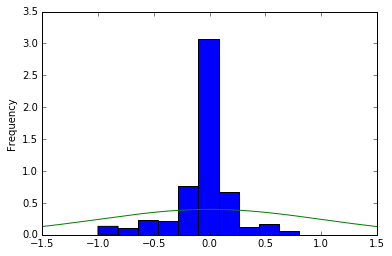

In [18]:
# Victim normal plot
tweetering.polarity.plot(kind='hist', normed=True)

range = np.arange(-1.5, 1.5, 0.001)
plt.plot(range, norm.pdf(range,0,1))

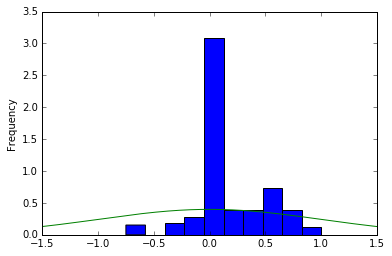

In [19]:
# Location normal plot
locationing.polarity.plot(kind='hist', normed=True)

range = np.arange(-1.5, 1.5, 0.001)
plt.plot(range, norm.pdf(range,0,1))

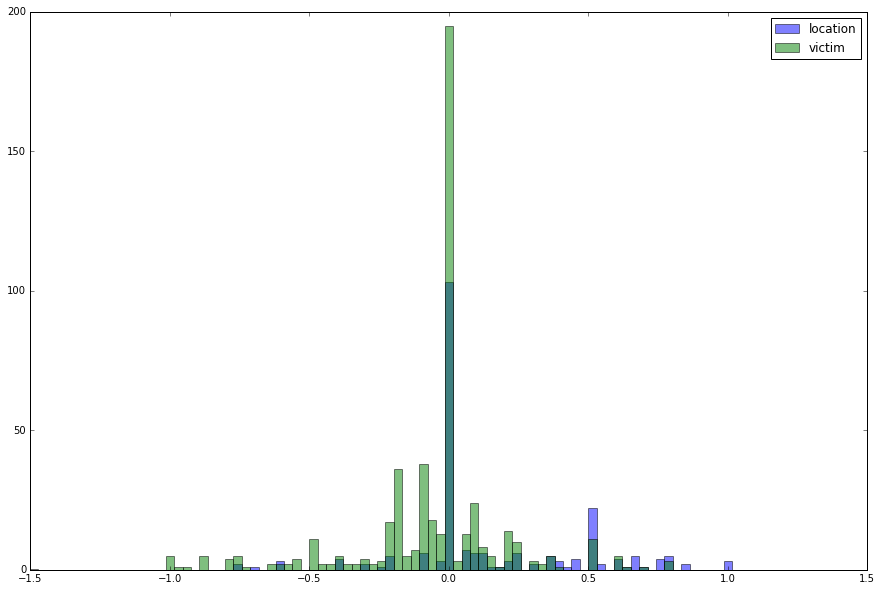

In [20]:
plt.figure(figsize=(15,10))
bins = np.linspace(-1.5, 1.5, 100)

plt.hist(locationing.polarity, bins, alpha=0.5, label='location')
plt.hist(tweetering.polarity, bins, alpha=0.5, label='victim')
plt.legend(loc='upper right')
plt.show()

We can summarize that, overall, it appears that the location has a more positive sentiment value than the victim dataset. It has a both higher sentiment mean and sentiment max value. The location's sentiment min value is lower, meaning that individuals' posts on the location were less negative. This is more apparent on the overlaid histograms, where the locations' values were generally higher around the 0.5 to 1 range. However, it should also be taken into consideration that the victim dataset was almost twice as large as that of the location.

### Two-Sample t-tests

*H0:* There is no difference in the sentiment/subjectivity means.

*Ha:* There is a difference in the sentiment/subjectivity means.

In [21]:
# Polarity
twosample_pol = scipy.stats.ttest_ind(locationing.polarity, tweetering.polarity)
twosample_pol

Ttest_indResult(statistic=8.7737683107845417, pvalue=1.2229372079860183e-17)

Since our p-value is as low as (1.223e-17), we can reject our null hypothesis of identical means for polarity. Each dataset had different mean sentiments.

In [22]:
# Subjectivity
twosample_sub = scipy.stats.ttest_ind(locationing.subjectivity, tweetering.subjectivity)
twosample_sub

Ttest_indResult(statistic=0.90693288692435392, pvalue=0.36474320373181157)

As far as subjectivity is concerned, we failed to reject the null hypothesis. This implies that since the means were not different, both datasets were overall equally objective/subjective.

### Dataset Differences

Since we have determined that the two datasets have different sentiment means, let's try and see if we can figure out how they are different. What are the most frequent words for each dataset? What are the most frequent hashtags?

#### Looking at most common words

In [23]:
# Victim

stop = stopwords.words('english')
# Removing stopwords
tweetering['Text'] = tweetering['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Finding most common words
pd.Series(' '.join(tweetering['Text']).lower().split()).value_counts()[:50]

#bakarihenderson     427
rt                   122
death                119
beaten                89
greece                74
black                 70
american              62
#greece               59
killed                49
the                   42
murder                39
white                 38
video                 37
&amp;                 36
man                   33
tourist               33
i                     31
this                  30
@realdonaldtrump      27
to                    26
greek                 26
family                25
racist                25
people                25
-                     24
selfie                23
young                 23
may                   23
emmett                22
for                   22
grad                  22
a                     21
us                    21
#bakarihenderson,     20
beating               20
i'm                   19
arizona               19
say                   19
photo                 19
murdered              19


In [24]:
# Location

stop = stopwords.words('english')
# Removing stopwords
locationing['Text'] = locationing['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Finding most common words
pd.Series(' '.join(locationing['Text']).lower().split()).value_counts()[:50]

#zakynthos          159
rt                   91
#greece              67
#zante               55
zakynthos            24
#laganas             21
island               19
#zakynthos,          19
.                    17
greece               16
@                    16
strikes              13
-                    13
km                   13
#zkynthos            13
min                  13
ago.                 13
(#greece)            13
#travel              13
#earthquake          13
#summer              12
beautiful            12
american             11
nw                   11
#bakarihenderson      9
holiday               9
&amp;                 9
(#)                   8
villas                8
the                   8
+                     7
ionian                7
in                    7
i                     7
#beach                7
morning               7
#holiday              6
info:                 6
islands               6
#sun                  6
available             6
#sea            

Looking at the top 50 most common words, it becomes apparent that despite a couple of mentions of the incident in the location dataset, the majority of the words revolve around vacationing and the environment (sun, sea, beach, etc).

#### Looking at most common hashtags

In [25]:
# Victim

# join all the tweets into one big text
text = " ".join(tweetering['Text'].values.astype(str))
# and then we pull out all the words with hashtags
match = re.findall(r"#(\w+)", text)
# hashtag counts
vict_count = collections.Counter(match)
vict_det=vict_count.most_common()
#vict_det

C:\Users\Georgia\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


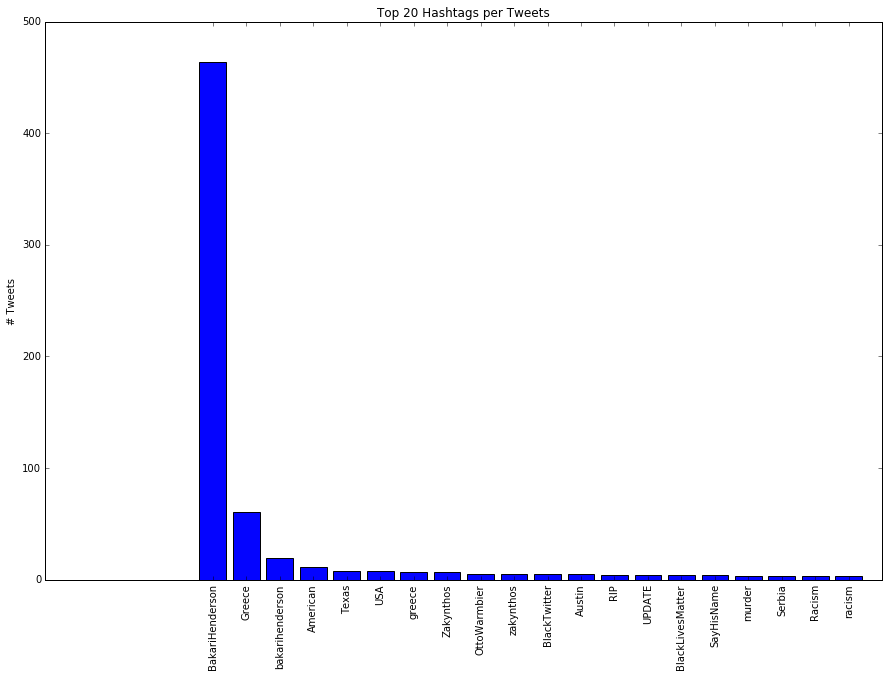

In [26]:
df = pd.DataFrame(vict_det)
Col_name=('hashtags','Freq')
df.columns = Col_name
df['Freq'] = df['Freq'].astype('int')
newdf= df.sort('Freq', ascending=False).head(20)[['hashtags','Freq']]

objects = newdf['hashtags']

y_pos = np.arange(len(objects))

performance = newdf['Freq']
performance
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, align='center', alpha=5)
plt.xticks(y_pos, objects)
plt.ylabel('# Tweets')
plt.title('Top 20 Hashtags per Tweets')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Location

# join all the tweets into one big text
text = " ".join(locationing['Text'].values.astype(str))
# and then we pull out all the words with hashtags
match = re.findall(r"#(\w+)", text)
# hashtag counts
loc_count = collections.Counter(match)
loc_det=loc_count.most_common()
#loc_det

C:\Users\Georgia\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


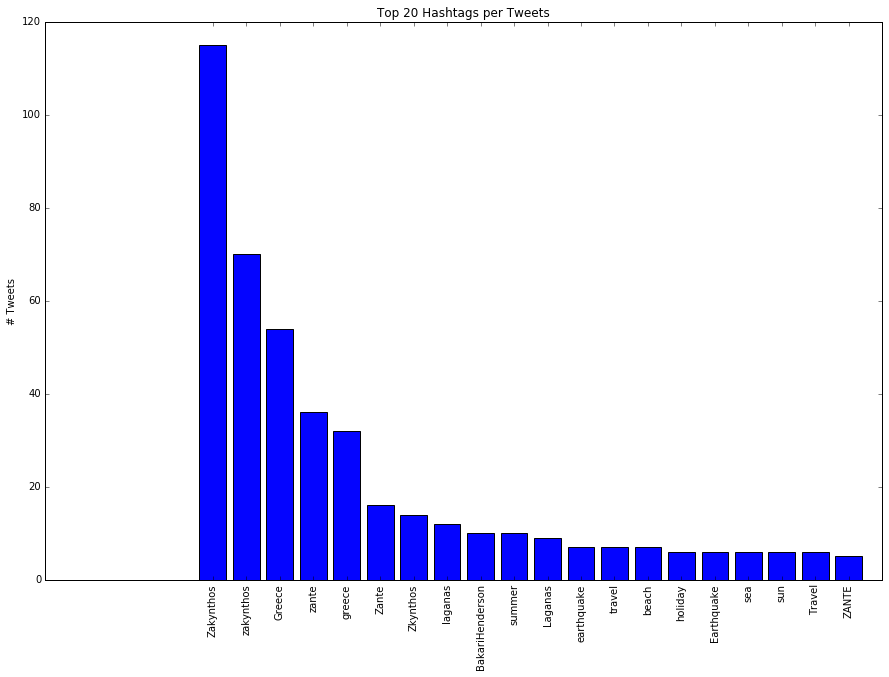

In [28]:
df=pd.DataFrame(loc_det)
Col_name=('Locations','Freq')
df.columns = Col_name
df['Freq'] = df['Freq'].astype('int')
newdf= df.sort('Freq', ascending=False).head(20)[['Locations','Freq']]

objects = newdf['Locations']

y_pos = np.arange(len(objects))

performance = newdf['Freq']
performance
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, align='center', alpha=5)
plt.xticks(y_pos, objects)
plt.ylabel('# Tweets')
plt.title('Top 20 Hashtags per Tweets')
plt.xticks(rotation=90)
plt.show()

Just by comparing the first 20 hashtags attached to each the location and the victim, we see a stark difference between the themes. The victims dataset mentions the island of Zakynthos and some basic information regarding the victim, but a recurring theme within the hashtags involves the topic of racism. On the other hand, the location dataset (in addition to location details, like the country and island's name) has more uplifting associations like "holiday" and "travel."

#### Conclusion

From the first glimpse at the data, it appeared as though tweets regarding both the victim and the location revolved around how awful the event was, indirectly implying that the attitude towards vacationing in Laganas may (in some ways) be stigmatized by the murder. However, upon closer inspection of the datasets (by observing the location's higher sentiment scores, the two-sample t-test results concluding there is a difference in mean sentiment scores and the difference in themes for both hashtags and most common words) it becomes more apparent that despite the location's acknowledgment of the tragic event, the individuals tweeting about Laganas either are not detered, are not aware of, or do not allow the event to dampen their vacation.

#### Further work

Originally, this project aimed to compare sentiments of the location before the event and after, however the inability to pull tweets older than one-to-two weeks presented a problem, as did the inability to pull tweets that responded to one particular thread (ex. responses to a news article regarding the event). Working to retrieve such data may prove particularly interesting, as would an analysis of the natives' sentiments. Just reading through their tweets made it appear as if the majority of them were news articles, however collecting tweets from the locals regarding the event may provide a different perspective on what transpired.